In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.optimizers import SGD
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
# Loading the CIFAR-10 datasets
from keras.datasets import cifar10

In [2]:
batch_size = 32 
n_classes = 10 
epochs = 40

In [3]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 6s 0us/step


In [4]:
height = x_train.shape[1]
width = x_train.shape[2]

In [5]:
# Validation dataset splitting
x_val = x_train[:5000,:,:,:]
y_val = y_train[:5000]
x_train = x_train[5000:,:,:,:]
y_train = y_train[5000:]

In [6]:
print('Training dataset: ', x_train.shape, y_train.shape)
print('Validation dataset: ', x_val.shape, y_val.shape)
print('Test dataset: ', x_test.shape, y_test.shape)

Training dataset:  (45000, 32, 32, 3) (45000, 1)
Validation dataset:  (5000, 32, 32, 3) (5000, 1)
Test dataset:  (10000, 32, 32, 3) (10000, 1)


In [23]:
print(y_train[0])
print(np.argmax(y_train[0]))

[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
6


In [17]:
# Create dictionary of target classes
label_dict = {
 0: 'airplane',
 1: 'automobile',
 2: 'bird',
 3: 'cat',
 4: 'deer',
 5: 'dog',
 6: 'frog',
 7: 'horse',
 8: 'ship',
 9: 'truck',
}

training:


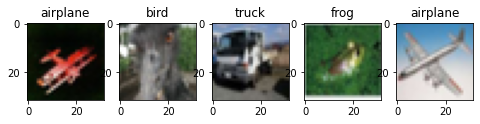

validation:


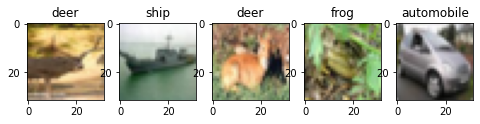

test:


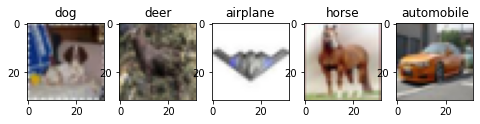

In [30]:
# Printing some images
cols=2
fig = plt.figure()
print('training:')
for i in range(5):
    a = fig.add_subplot(cols, np.ceil(n_classes/float(cols)), i + 1)
    img_num = np.random.randint(x_train.shape[0])
    image = x_train[img_num]
    id = y_train[img_num]
    plt.imshow(image)
    a.set_title(label_dict[np.argmax(id)])
fig.set_size_inches(8,8)
plt.show()

fig = plt.figure()
print('validation:')
for i in range(5):
    a = fig.add_subplot(cols, np.ceil(n_classes/float(cols)), i + 1)
    img_num = np.random.randint(x_val.shape[0])
    image = x_val[img_num]
    id = y_val[img_num]
    plt.imshow(image)
    a.set_title(label_dict[np.argmax(id)])
fig.set_size_inches(8,8)
plt.show()

fig = plt.figure()
print('test:')
for i in range(5):
    a = fig.add_subplot(cols, np.ceil(n_classes/float(cols)), i + 1)
    img_num = np.random.randint(x_test.shape[0])
    image = x_test[img_num]
    id = y_test[img_num]
    plt.imshow(image)
    a.set_title(label_dict[np.argmax(id)])
fig.set_size_inches(8,8)
plt.show()

In [9]:
# Convert labels to categorical
y_train = np_utils.to_categorical(y_train, n_classes)
y_val = np_utils.to_categorical(y_val, n_classes)
y_test = np_utils.to_categorical(y_test, n_classes)
# Datasets pre-processing
x_train = x_train.astype('float32')
x_val = x_val.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_val /= 255
x_test /= 255

In [10]:
def create_model():
  model = Sequential()
  model.add(Conv2D(filters=128, kernel_size=(3, 3), input_shape=(height, width, 3), strides=1, padding='same', activation='relu'))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Conv2D(filters=128, kernel_size=(3, 3), strides=1, activation='relu'))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Dropout(0.25))
  model.add(Conv2D(filters=64, kernel_size=(2, 2), strides=1, activation='relu'))
  model.add(MaxPooling2D(pool_size=(1,1)))
  model.add(Conv2D(filters=32, kernel_size=(2, 2), strides=1, activation='relu'))
  model.add(MaxPooling2D(pool_size=(1,1)))
  model.add(Conv2D(filters=32, kernel_size=(2, 2), strides=1, activation='relu'))
  model.add(MaxPooling2D(pool_size=(1,1)))
  model.add(Dropout(0.25))
  model.add(Flatten())
  model.add(Dense(64, activation='relu'))
  model.add(Dense(n_classes, activation='softmax'))
  return model

def optimizer():
    return SGD(lr=1e-2)
    
model = create_model()
model.compile(optimizer=optimizer(),
              loss='categorical_crossentropy',
              metrics=['accuracy']
              )
model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_val,y_val),verbose=1)
model.summary()

Epoch 1/40
1407/1407 [==============================] - 248s 176ms/step - loss: 2.2722 - accuracy: 0.1289 - val_loss: 2.0975 - val_accuracy: 0.2228
Epoch 2/40
1407/1407 [==============================] - 246s 175ms/step - loss: 1.9409 - accuracy: 0.2671 - val_loss: 2.3508 - val_accuracy: 0.2278
Epoch 3/40
1407/1407 [==============================] - 245s 174ms/step - loss: 1.7337 - accuracy: 0.3602 - val_loss: 1.5897 - val_accuracy: 0.4260
Epoch 4/40
1407/1407 [==============================] - 245s 174ms/step - loss: 1.6002 - accuracy: 0.4118 - val_loss: 1.5610 - val_accuracy: 0.4480
Epoch 5/40
1407/1407 [==============================] - 245s 174ms/step - loss: 1.4835 - accuracy: 0.4570 - val_loss: 1.4610 - val_accuracy: 0.4802
Epoch 6/40
1407/1407 [==============================] - 245s 174ms/step - loss: 1.3943 - accuracy: 0.4915 - val_loss: 1.3063 - val_accuracy: 0.5264
Epoch 7/40
1407/1407 [==============================] - 246s 175ms/step - loss: 1.3411 - accuracy: 0.5150 - val_

In [11]:
scores = model.evaluate(x_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100), "| Loss: %.5f" % (scores[0]))

Accuracy: 70.68% | Loss: 0.87073


In [13]:
scores_train = model.evaluate(x_train, y_train, verbose=0)
print("Accuracy: %.2f%%" % (scores_train[1]*100), "| Loss: %.5f" % (scores_train[0]))

Accuracy: 75.90% | Loss: 0.68660


test:
airplane	20.21%
automobile	0.02%
bird	6.61%
cat	3.53%
deer	67.26%
dog	1.07%
frog	0.26%
horse	0.11%
ship	0.85%
truck	0.07%


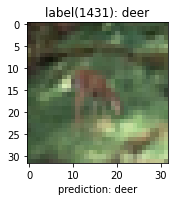

In [203]:
n = 5

fig = plt.figure()
print('test:')
for i in range(1):
    prediction = model.predict(x_test[img_num-1:img_num])

    a = fig.add_subplot(n, 1, i + 1)
    img_num = np.random.randint(x_test.shape[0])
    image = x_test[img_num]
    id = y_test[img_num]
    plt.imshow(image)

    a.set_title("label(" + str(img_num) + "): " + label_dict[np.argmax(id)])
    a.set_xlabel("prediction: " + label_dict[np.argmax(prediction[0])])

    for i in range(len(prediction[0])):
      print(label_dict[i], end='\t')
      p = prediction[0] * 100.00
      print("{:.2f}".format(prediction[0][i] * 100.00) + "%")

fig.set_size_inches(15,15)
plt.show()